In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotel_df = pd.read_csv("hotel_bookings.csv")

** Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report**

In [3]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [4]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel_df.shape

(119390, 32)

In [8]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
hotel_df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


<Axes: >

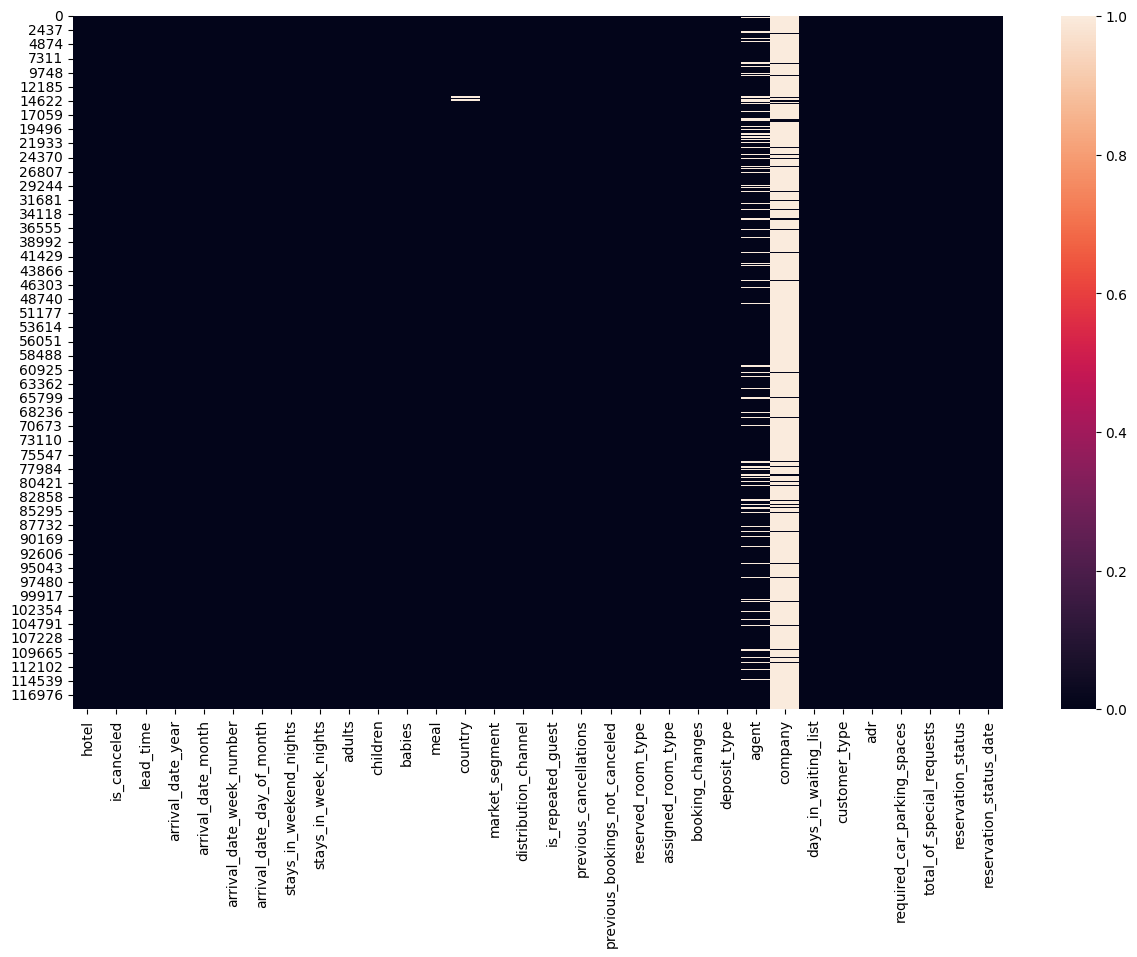

In [11]:
#missing number heatmap
plt.figure(figsize=(15,9))
sns.heatmap(hotel_df.isna())

In [6]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

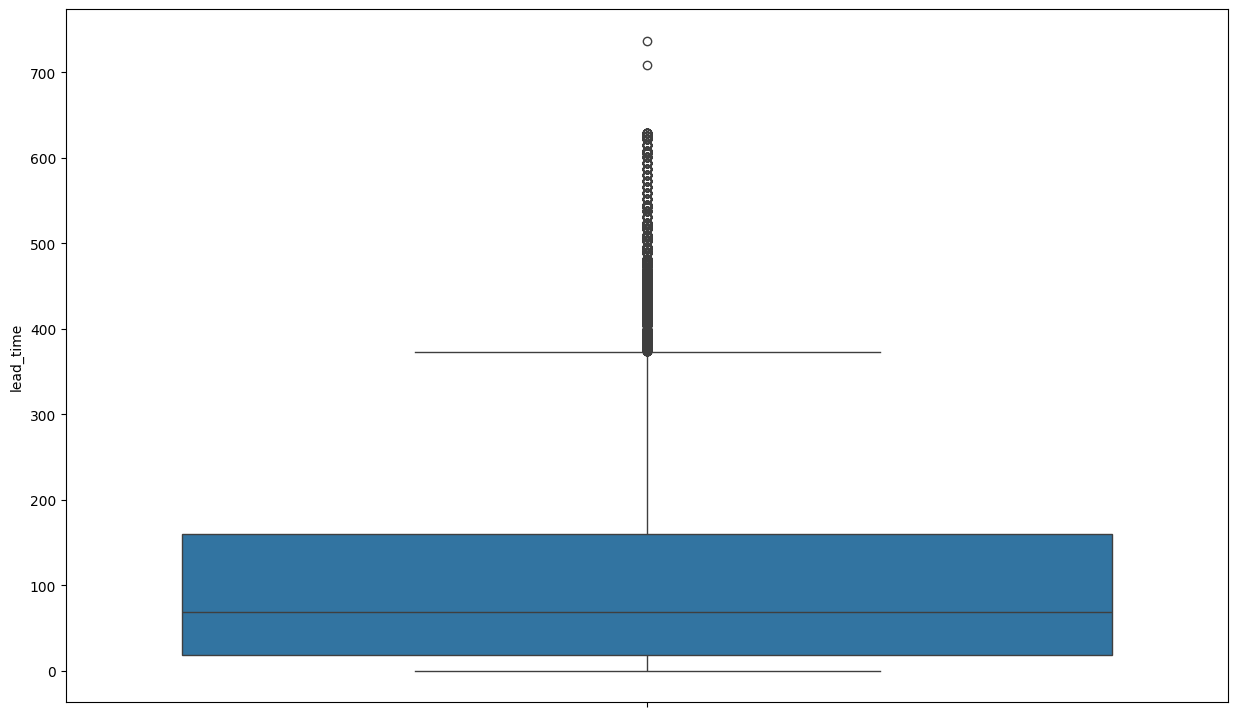

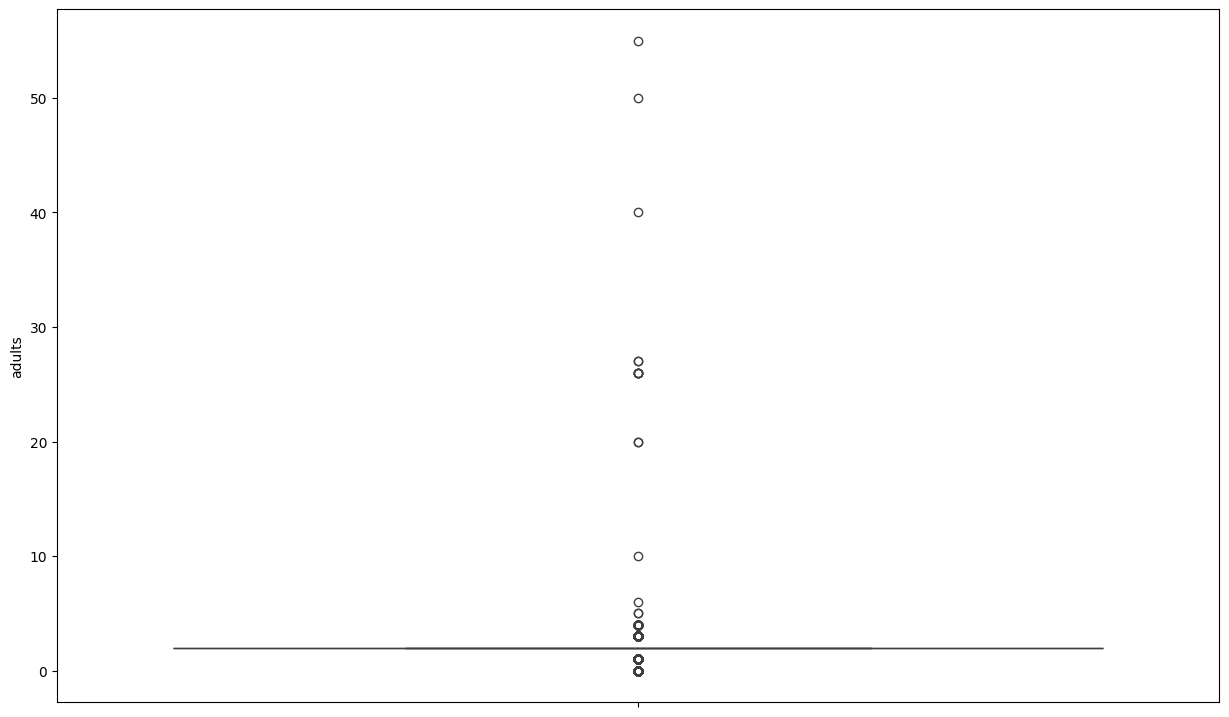

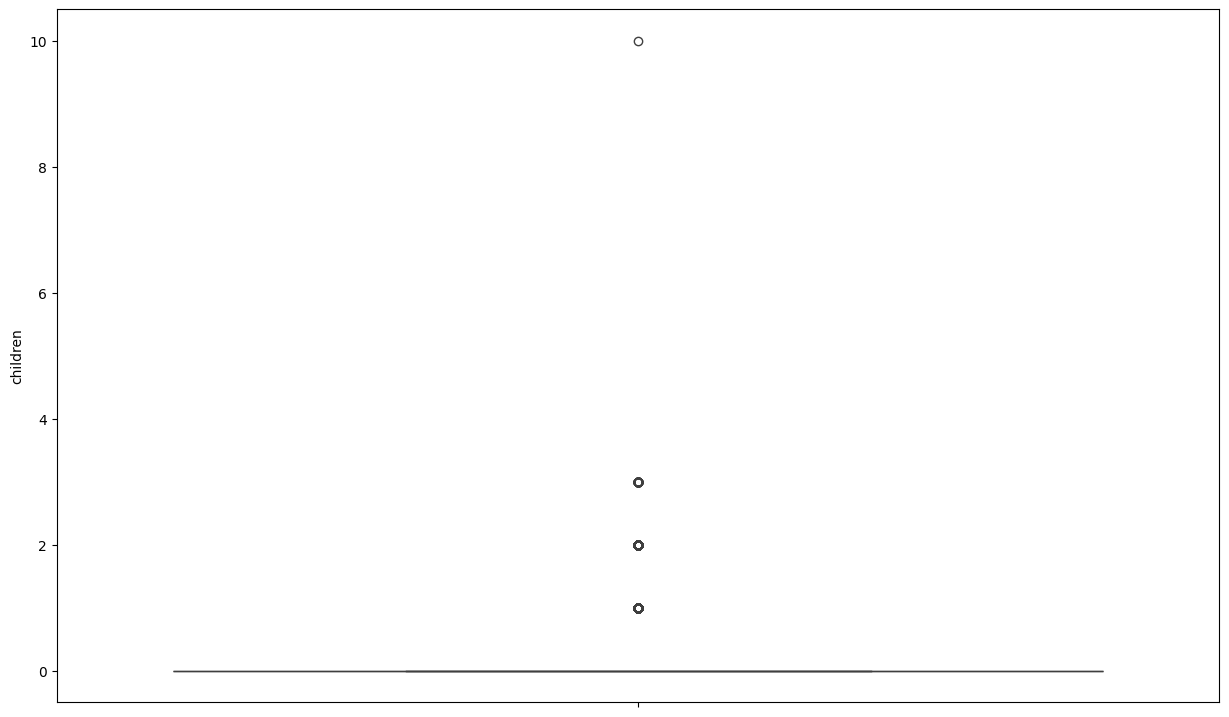

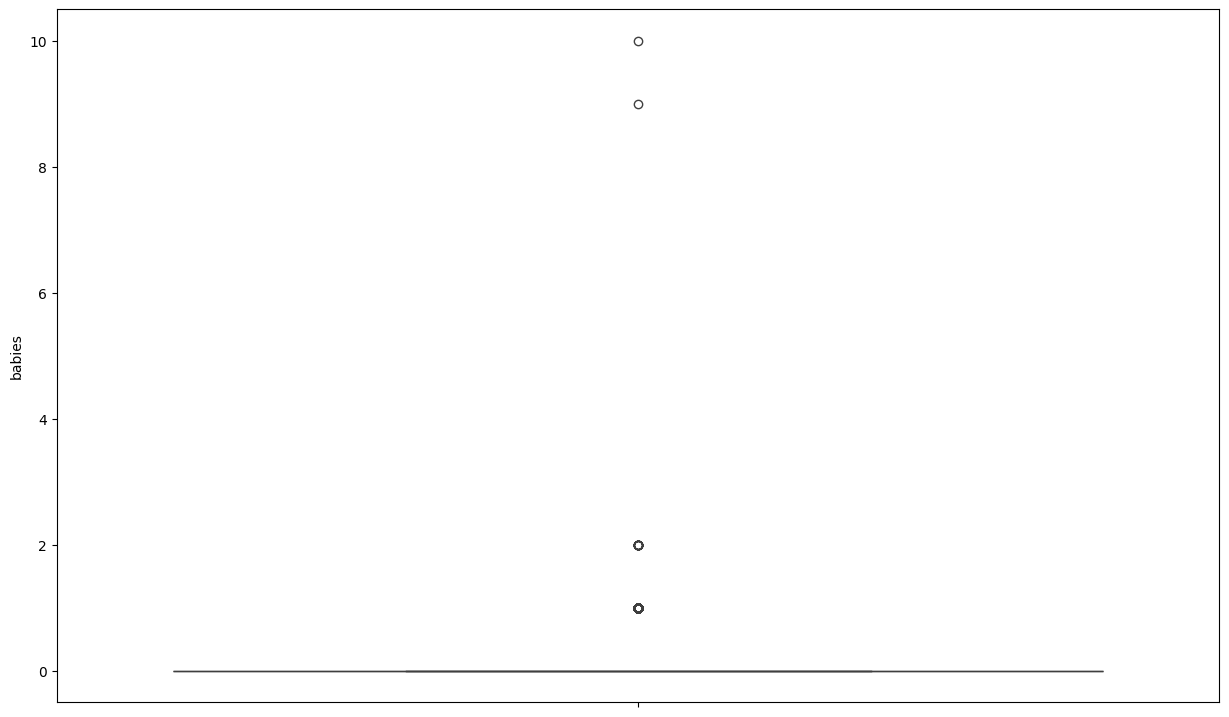

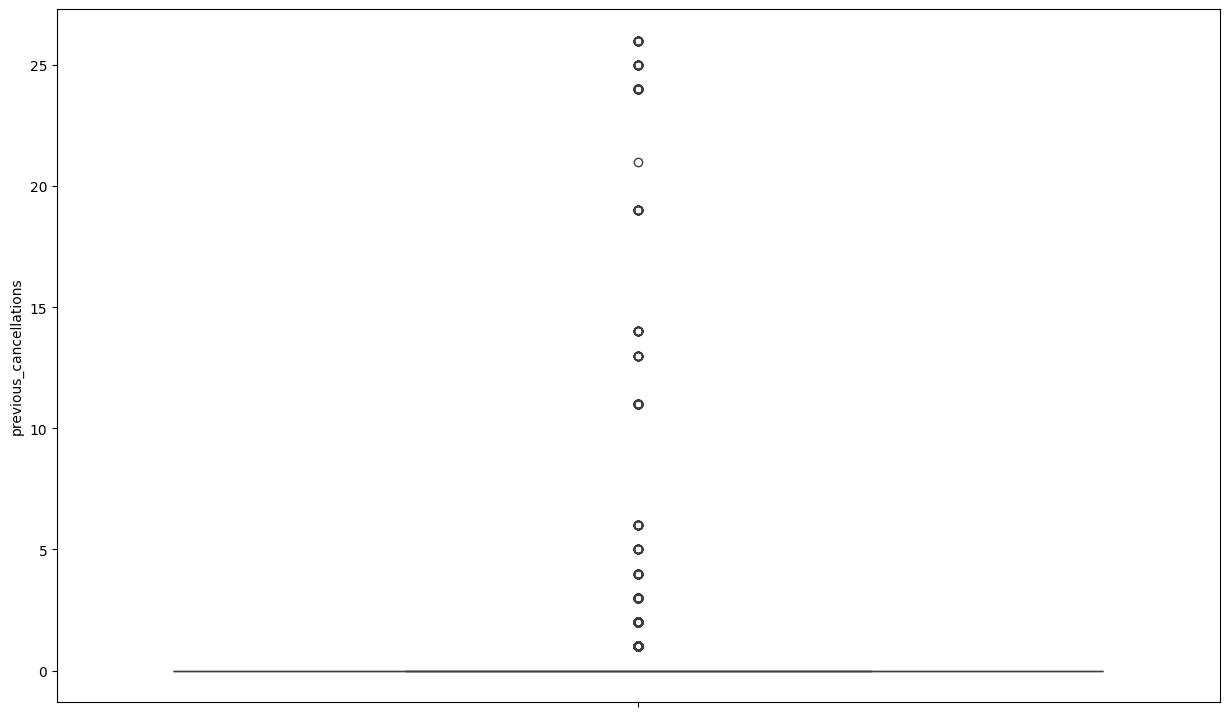

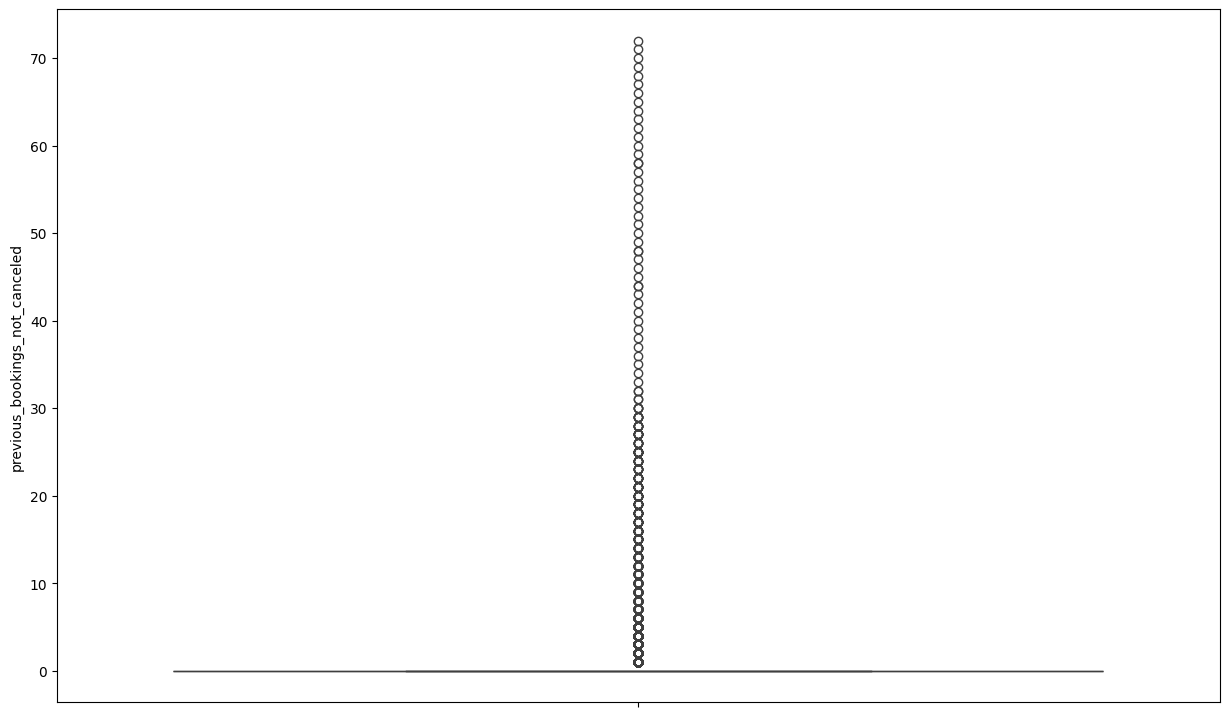

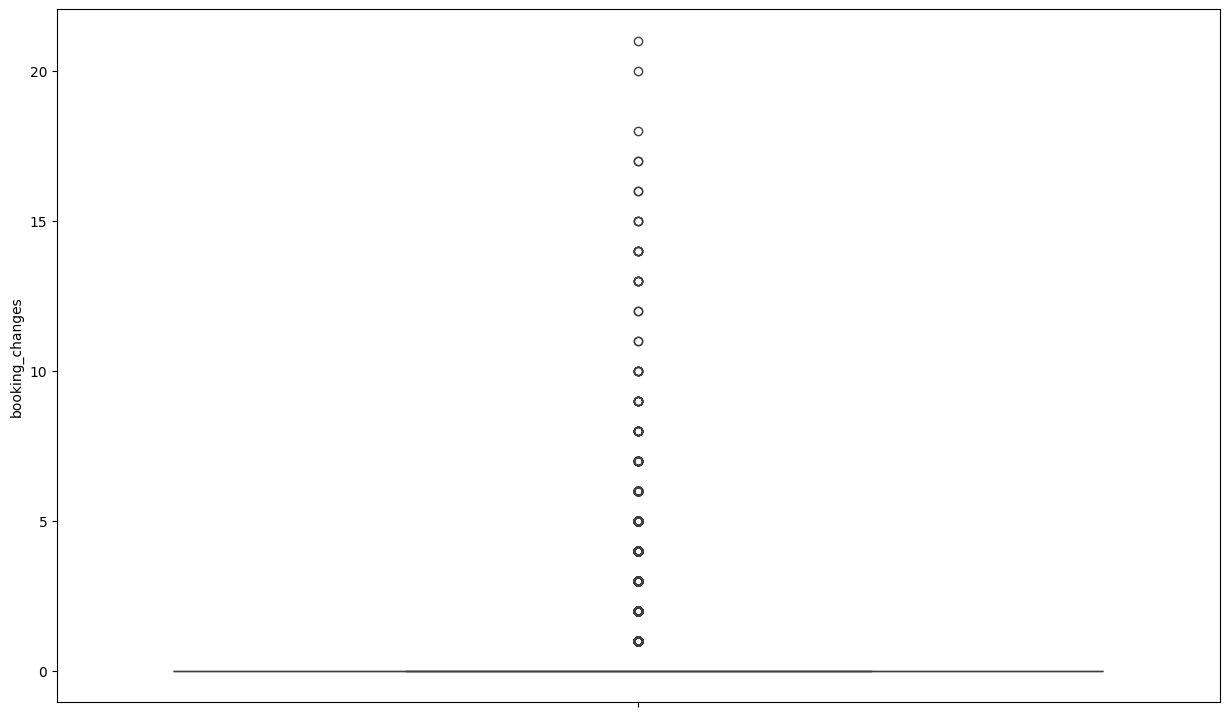

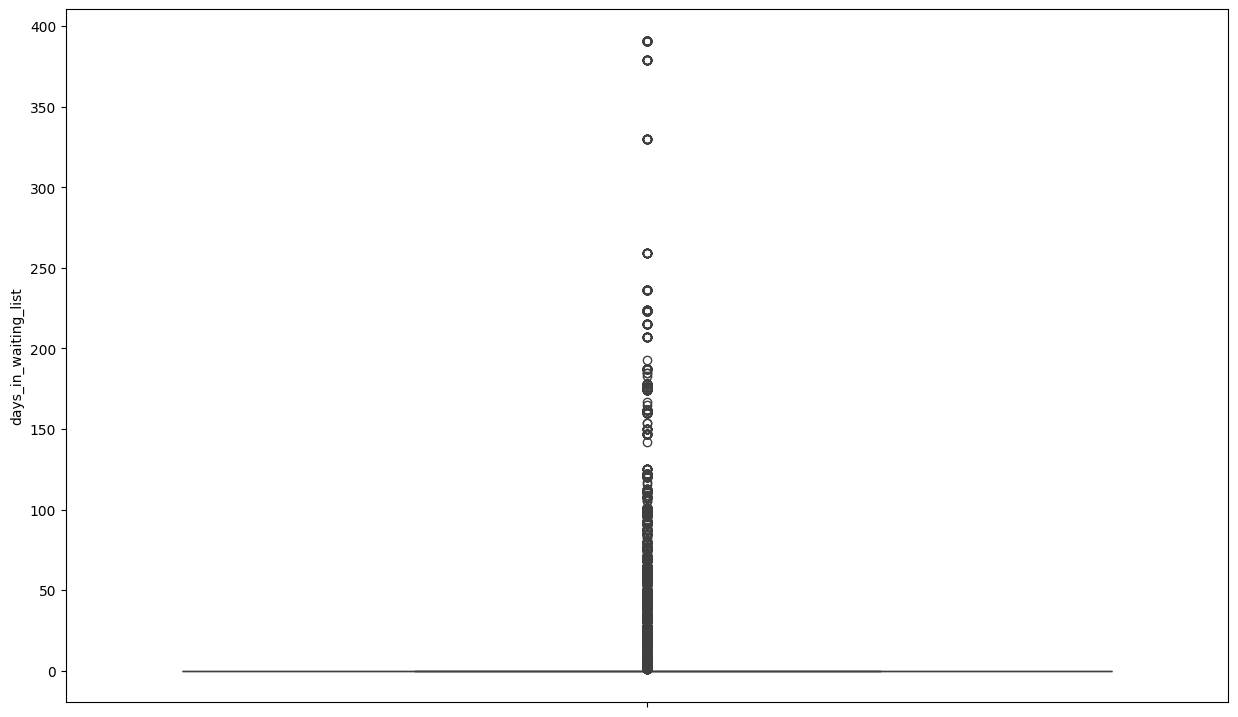

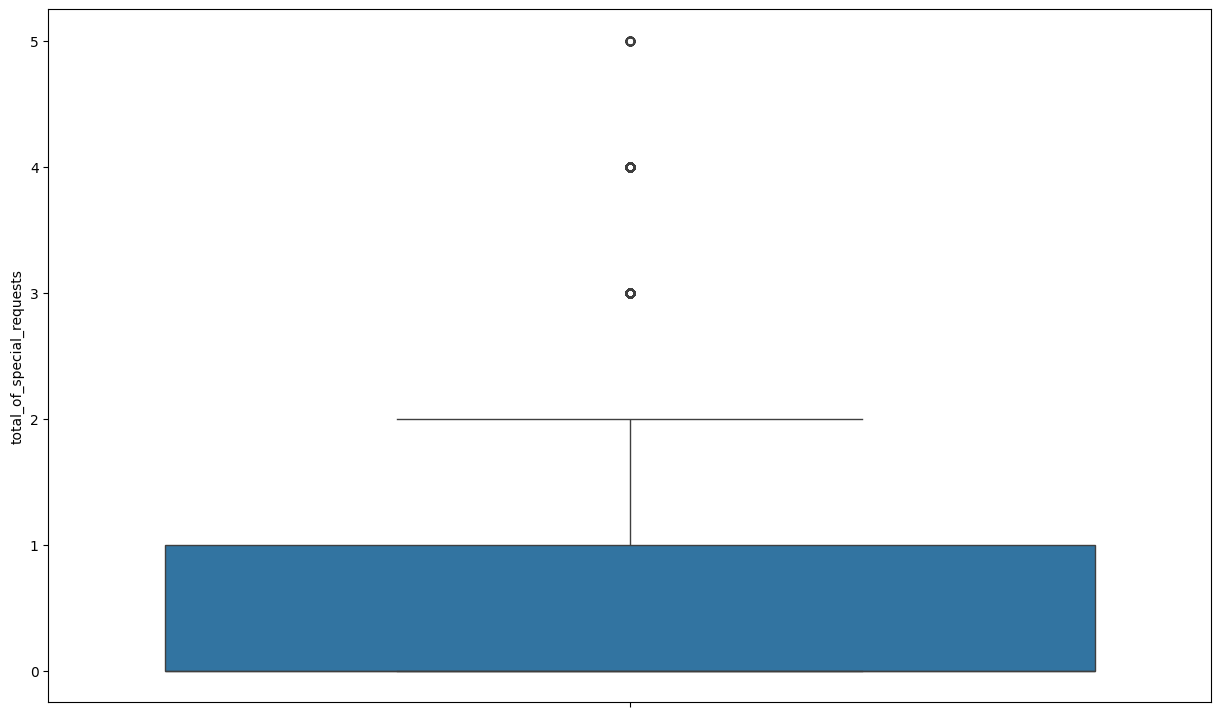

In [15]:
key_num_cols = ['lead_time', 'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests'
       ]
for col in key_num_cols :
  plt.figure(figsize=(15,9))
  sns.boxplot(hotel_df[col])

In [17]:
q1 = hotel_df.quantile(0.25, numeric_only=True)
q3 = hotel_df.quantile(0.75, numeric_only=True)
iqr = q3 - q1

In [19]:
numeric_cols = hotel_df.select_dtypes(include=np.number).columns
hotel_iqr = hotel_df[~((hotel_df[numeric_cols] < (q1 - 1.5 * iqr)) |(hotel_df[numeric_cols] > (q3 + 1.5 * iqr))).any(axis=1)]

  Quality Report : There is alot of redundunt columns that can be driven from other columns sush as [arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month'] which can just be replaced by date

 Phase 2: Data Cleaning

In [20]:
hotel_iqr = hotel_iqr.drop_duplicates()

In [21]:
hotel_iqr.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [22]:
hotel_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39314 entries, 4 to 119388
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           39314 non-null  object 
 1   is_canceled                     39314 non-null  int64  
 2   lead_time                       39314 non-null  int64  
 3   arrival_date_year               39314 non-null  int64  
 4   arrival_date_month              39314 non-null  object 
 5   arrival_date_week_number        39314 non-null  int64  
 6   arrival_date_day_of_month       39314 non-null  int64  
 7   stays_in_weekend_nights         39314 non-null  int64  
 8   stays_in_week_nights            39314 non-null  int64  
 9   adults                          39314 non-null  int64  
 10  children                        39311 non-null  float64
 11  babies                          39314 non-null  int64  
 12  meal                            3931

In [24]:
hotel_iqr[['is_canceled', 'is_repeated_guest']] = hotel_iqr[['is_canceled', 'is_repeated_guest']].astype('bool')

In [28]:
hotel_iqr[['agent' , 'company', 'children' , 'adr']].fillna(0)

,agent,company,children,adr
4,240.0,0.0,0.0,98.00
6,0.0,0.0,0.0,107.00
7,303.0,0.0,0.0,103.00
8,240.0,0.0,0.0,82.00
9,15.0,0.0,0.0,105.50
...,...,...,...,...
119381,14.0,0.0,0.0,99.00
119383,42.0,0.0,0.0,87.60
119384,394.0,0.0,0.0,96.14
119385,394.0,0.0,0.0,96.14


In [29]:
for value in hotel_iqr['adr'] :
  if value > 1000 :
    value = 1000

In [31]:
hotel_iqr[['children', 'agent' , 'company' , 'adr']] = hotel_iqr[['children', 'agent' , 'company' , 'adr']].fillna(0).astype('int64')

In [32]:
hotel_iqr['country'].fillna('unknown')

,country
4,GBR
6,PRT
7,PRT
8,PRT
9,PRT
...,...
119381,DEU
119383,DEU
119384,BEL
119385,BEL


 Phase 3: Feature Engineering & Preprocessing

In [33]:
categorical_features = hotel_iqr.select_dtypes(include='object').columns
for col in categorical_features :
  print(f'{col} : {hotel_iqr[col].unique()}')

hotel : ['Resort Hotel' 'City Hotel']
arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal : ['BB' 'FB' 'HB' 'Undefined' 'SC']
country : ['GBR' 'PRT' 'IRL' 'FRA' 'ESP' 'ROU' 'NOR' 'USA' 'POL' 'BEL' 'DEU' 'CHE'
 'GRC' 'AUS' 'BRA' 'FIN' 'DNK' 'NLD' 'ALB' 'RUS' 'CN' 'MEX' 'CHN' 'MAR'
 'SWE' 'ITA' 'SVN' 'SMR' 'CHL' 'LVA' 'AUT' 'LTU' 'ARG' 'LUX' 'TUR' 'ISR'
 'CYM' 'ZWE' 'CZE' 'CRI' 'KOR' 'ARE' 'TUN' 'IND' 'DZA' 'AND' 'MOZ' 'GIB'
 'URY' 'BLR' 'EST' 'CYP' 'ZAF' 'JEY' 'COL' 'KWT' 'HRV' 'MDV' 'HUN' nan
 'SVK' 'LBN' 'HKG' 'SYC' 'AGO' 'PHL' 'NZL' 'KAZ' 'THA' 'PRI' 'MYS' 'NGA'
 'VEN' 'UKR' 'ARM' 'LKA' 'CMR' 'IRN' 'BIH' 'MUS' 'OMN' 'BGR' 'CIV' 'DOM'
 'JOR' 'SYR' 'JPN' 'SGP' 'BDI' 'VNM' 'PLW' 'QAT' 'EGY' 'SUR' 'CPV' 'SRB'
 'MDG' 'CAF' 'UZB' 'NPL' 'IDN' 'BHS' 'CUB' 'PAK' 'TGO' 'TWN' 'ISL' 'AZE'
 'SEN' 'SAU' 'PER' 'ECU' 'HND' 'GEO' 'ZMB' 'KHM' 'MCO' 'BGD' 'IMN' 'TJK'
 'GGY' 'BEN' 'MAC' 'VGB' 'MKD' 'MLT' 'TMP' 'TZA' '

In [34]:
hotel_iqr['total_guests'] = hotel_iqr['adults'] + hotel_iqr['children'] + hotel_iqr['babies']

In [35]:
hotel_iqr['total_nights'] = hotel_iqr['stays_in_weekend_nights'] + hotel_iqr['stays_in_week_nights']

In [37]:
hotel_iqr['arrival_date'] = hotel_iqr['arrival_date_year'].astype(str) + '-' + hotel_iqr['arrival_date_month'] + '-' + hotel_iqr['arrival_date_day_of_month'].astype(str)
hotel_iqr['arrival_date'] = pd.to_datetime(hotel_iqr['arrival_date'], format='%Y-%B-%d')

In [39]:
hotel_iqr['is_family'] = ((hotel_iqr['adults'] > 0) & (hotel_iqr['children'] > 0)).astype(int)

In [41]:
#one hot encoding
hotel_iqr = pd.get_dummies(hotel_iqr, columns=['hotel' , 'meal' , 'market_segment' , 'distribution_channel' , 'deposit_type' , 'customer_type', 'reservation_status'])

In [42]:
#frequancy encoding
hotel_iqr['country'] = hotel_iqr['country'].map(hotel_iqr['country'].value_counts())

In [43]:
#ordinal encoding
hotel_iqr['reserved_room_type'] = hotel_iqr['reserved_room_type'].replace({'A' : 1 , 'B' : 2 , 'C' : 3 , 'D' : 4 , 'E' : 5 , 'F' : 6 , 'G' : 7 , 'H' : 8 , 'L' : 9})
hotel_iqr['assigned_room_type'] = hotel_iqr['assigned_room_type'].replace({'A' : 1 , 'B' : 2 , 'C' : 3 , 'D' : 4 , 'E' : 5 , 'F' : 6 , 'G' : 7 , 'H' : 8 , 'L' : 9 , 'K' : 10})

/tmp/ipython-input-14598994.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hotel_iqr['reserved_room_type'] = hotel_iqr['reserved_room_type'].replace({'A' : 1 , 'B' : 2 , 'C' : 3 , 'D' : 4 , 'E' : 5 , 'F' : 6 , 'G' : 7 , 'H' : 8 , 'L' : 9})


In [ ]:
#train & test split
hotel_iqr.drop(['reservation_status' , 'reservation_status_date'] , axis=1 , inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hotel_iqr.drop('is_canceled', axis=1), hotel_iqr['is_canceled'], test_size=0.2, random_state=42)
